## Determining the correlation of various factors that contributes to the gross earnings of a moivie

In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #Adjusting the configuration of the created plots

# Reading the data
df = pd.read_csv("/Users/rolandtetteh/Downloads/movies.csv")

In [3]:
#Viewing the data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
#Checking for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{}-{}%".format(col,pct_missing))

print("")
    
#Alternatively:
missing_data = df.isnull()
for col in missing_data.columns.values.tolist():
    print(col)
    print (missing_data[col].value_counts())
    print("")

budget-0.0%
company-0.0%
country-0.0%
director-0.0%
genre-0.0%
gross-0.0%
name-0.0%
rating-0.0%
released-0.0%
runtime-0.0%
score-0.0%
star-0.0%
votes-0.0%
writer-0.0%
year-0.0%

budget
False    6820
Name: budget, dtype: int64

company
False    6820
Name: company, dtype: int64

country
False    6820
Name: country, dtype: int64

director
False    6820
Name: director, dtype: int64

genre
False    6820
Name: genre, dtype: int64

gross
False    6820
Name: gross, dtype: int64

name
False    6820
Name: name, dtype: int64

rating
False    6820
Name: rating, dtype: int64

released
False    6820
Name: released, dtype: int64

runtime
False    6820
Name: runtime, dtype: int64

score
False    6820
Name: score, dtype: int64

star
False    6820
Name: star, dtype: int64

votes
False    6820
Name: votes, dtype: int64

writer
False    6820
Name: writer, dtype: int64

year
False    6820
Name: year, dtype: int64



In [5]:
# Column data types
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
#Cleaning the data

#Changing the data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [7]:
#Cleaning the data types

#Creating the correct year column

df['adjusted_year'] = df['released'].astype(str).str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,adjusted_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [8]:
df.drop(columns='year',inplace=True)
df.rename(columns={"adjusted_year":"year"},inplace=True)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
#Sorting by gross revenue

pd.set_option("display.max_rows", 20)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997


In [11]:
#Droping Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

## Exploratory Data Analysis 

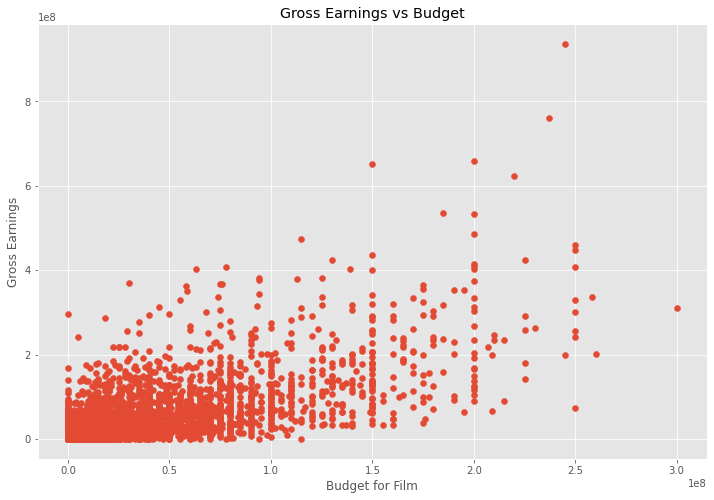

In [12]:
#Scatter Plot (Gross vs Budget)

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Gross Earnings vs Budget")
plt.xlabel("Budget for Film")
plt.ylabel("Gross Earnings")

plt.show()

In [13]:
df1 = df.sort_values(by=['gross'], inplace=False, ascending=False)
df1.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

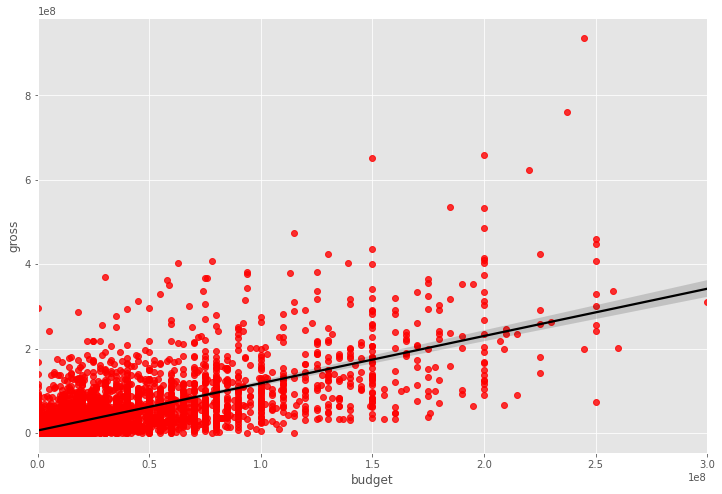

In [14]:
sns.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})

In [15]:
#Analyzing the correlation

#pearson, kendall, spearman
df.corr(method="kendall")
df.corr(method="spearman")
df.corr(method="pearson") #Method in Consideration

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


In [16]:
#Analyzing the correlation

#pearson, kendall, spearman
df.corr(method="kendall")
df.corr(method="spearman")
df.corr(method="pearson") #Method in Consideration

,budget,gross,runtime,score,votes
budget,1.000000,0.712196,0.268226,0.042145,0.503924
gross,0.712196,1.000000,0.224579,0.165693,0.662457
runtime,0.268226,0.224579,1.000000,0.395343,0.317399
score,0.042145,0.165693,0.395343,1.000000,0.393607
votes,0.503924,0.662457,0.317399,0.393607,1.000000


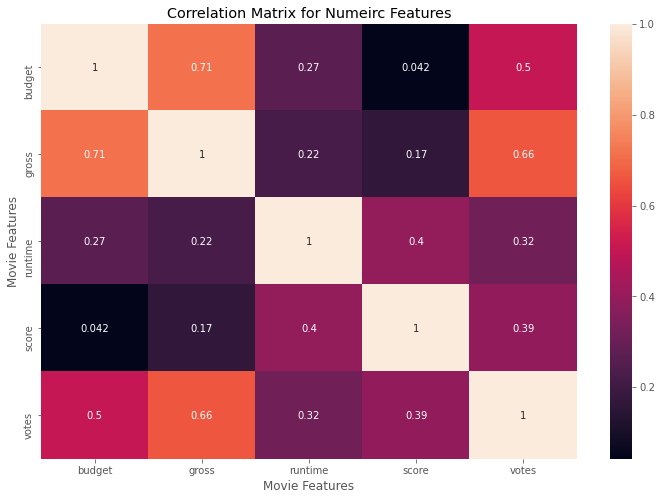

In [17]:
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot = True) 
plt.title("Correlation Matrix for Numeirc Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")


plt.show()

In [18]:
#Analyzing the Companies
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [19]:
df2 = df.copy()

for colname in df2.columns:
    if df2[colname].dtype == "object":
        df2[colname] = df2[colname].astype('category')
        df2[colname] = df2[colname].cat.codes
        
df2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,0


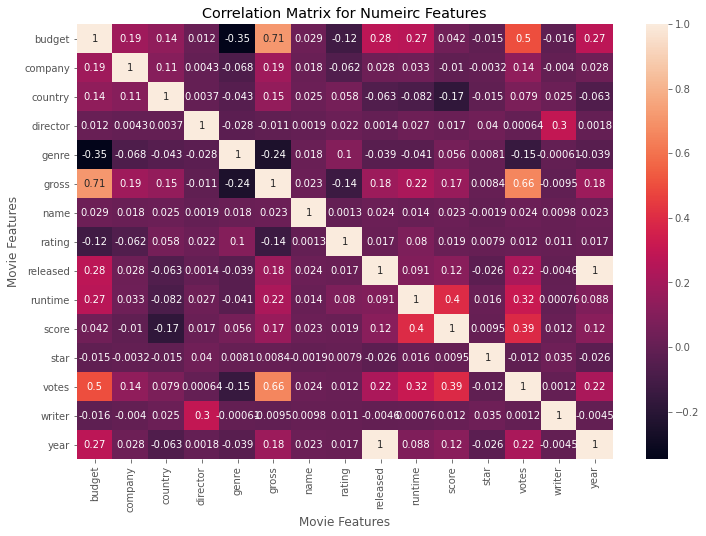

In [20]:
correlation_matrix2 = df2.corr(method="pearson")
sns.heatmap(correlation_matrix2, annot = True) 
plt.title("Correlation Matrix for Numeirc Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")


plt.show()

In [21]:
df2.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.088342


In [22]:
corr_pairs = correlation_matrix2.unstack()
corr_pairs

budget  budget      1.000000
        company     0.187205
        country     0.137635
        director    0.011602
        genre      -0.346794
                      ...   
year    score       0.117679
        star       -0.026052
        votes       0.220797
        writer     -0.004546
        year        1.000000
Length: 225, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.346794
budget    genre      -0.346794
genre     gross      -0.242676
gross     genre      -0.242676
country   score      -0.174414
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     budget      0.503924
budget    votes       0.503924
gross     votes       0.662457
votes     gross       0.662457
gross     budget      0.712196
budget    gross       0.712196
released  year        0.999389
year      released    0.999389
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64